In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For creating plots
import statsmodels.api as sm  # For estimating statistical models
import io
from google.colab import files  # For file operations in Google Colab
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.stats.api as sms
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

# Import Excel File

In [20]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Gets the filename of the uploaded file

Without_TOT_D1 = pd.read_excel(io.BytesIO(uploaded[filename]))  # Reads the uploaded file into a DataFrame
Without_TOT_D1.to_csv('/content/data.csv', index=False)
print("Data saved as CSV file.")

Saving Without_TOT_D1.xlsx to Without_TOT_D1.xlsx
Data saved as CSV file.


# Normalization

In [22]:
# 2000 - 2009 Dataframe
Altered_Data = Without_TOT_D1.drop(columns = ['Player', 'Position', 'Team', 'Season', 'GP'])

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(Altered_Data)

normalized_df = pd.DataFrame(normalized_data, columns=Altered_Data.columns)
normalized_df.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,Personal_Fouls,PTS
0,-0.240775,-0.348021,0.742015,-0.677921,-0.716683,0.075648,-0.043045,-0.102814,0.628676,0.342580,...,-0.882734,0.216378,-1.219458,-1.348012,-1.374161,-0.061490,-1.175267,-0.892096,-1.235166,-0.443591
1,-0.887150,-0.821070,-0.982402,-0.677921,-0.716683,0.796005,-0.810040,-0.660443,-1.347896,-1.286435,...,-0.615299,-1.268817,-0.736618,-0.722725,-0.805066,-0.658292,-0.491493,-0.125522,-0.282340,-0.896262
2,1.883031,1.759201,0.468840,-0.677921,-0.421023,-0.543606,2.257940,2.254433,0.403277,0.002456,...,2.272998,0.849273,1.315452,2.290024,2.081062,0.589567,0.876054,1.024338,1.078841,1.903592
3,-1.256508,-1.165106,-2.109248,-0.522503,-0.539287,-0.151833,-1.219104,-1.167377,-1.972076,-2.145695,...,-0.882734,-0.559974,-1.340168,-1.063790,-1.211563,-0.332763,-0.263569,-0.892096,-1.371284,-1.198043
4,-0.840981,-0.627550,-1.648266,-0.677921,-0.716683,0.164113,-0.656641,-0.432322,-1.954738,-2.145695,...,-0.615299,-0.003026,-0.736618,-1.006946,-0.927015,-0.766801,-0.719418,-0.700453,-0.146222,-0.829199


# Dimension Reduction - Principal Component Analysis


In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Find indices of NaN values
nan_indices = np.isnan(normalized_data).any(axis=1)

# Remove rows with NaN values
Altered_Data_Dropped = normalized_df[~nan_indices]
Altered_Data_Dropped = Altered_Data_Dropped.reset_index(drop = True)

# Apply PCA and reduce to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(Altered_Data_Dropped)

# Extracting the PCA loadings
pca_loadings = pca.components_.T
pca_loadings_df = pd.DataFrame(pca_loadings, index=Altered_Data_Dropped.columns)
pca_loadings_df.columns = ['PC1', 'PC2', 'PC3']
pca_loadings_df

,PC1,PC2,PC3
FG,0.306877,-0.087244,0.020805
FGA,0.295082,-0.144520,0.076844
FG%,0.136157,0.246569,-0.412428
3P,0.106833,-0.386271,-0.229649
3PA,0.110213,-0.391485,-0.181643
3P%,0.021788,-0.320305,-0.193742
2P,0.304979,0.029899,0.098430
2PA,0.300652,-0.002820,0.168655
2P%,0.129803,0.184515,-0.490337
eFG%,0.119266,0.041931,-0.610233


In [40]:
# Creating PCA Variance Table
Percentage_of_Variance_Explained = pca.explained_variance_ratio_
Variance_Explained = pca.explained_variance_
PCA_Table = pd.DataFrame(Variance_Explained.round(2))
PCA_Table['Percentage of Variance Explained'] = Percentage_of_Variance_Explained.round(4)*100
PCA_Table['Cumulative Percentage of Variance Explained'] = PCA_Table['Percentage of Variance Explained'].cumsum()
PCA_Table = PCA_Table.rename(columns = {0: 'Variance Explained'})
PCA_Table = PCA_Table.set_index(pd.Index(['PC1', 'PC2', 'PC3']))
PCA_Table

,Variance Explained,Percentage of Variance Explained,Cumulative Percentage of Variance Explained
PC1,9.89,48.04,48.04
PC2,4.12,20.03,68.07
PC3,1.94,9.43,77.50


In [25]:
# Subsetting PCAs
PC1 = pd.DataFrame(pca_loadings_df['PC1'])
PC2 = pd.DataFrame(pca_loadings_df['PC2'])
PC3 = pd.DataFrame(pca_loadings_df['PC3'])

In [26]:
# PC Analysis
Sorted_PC1 = PC1.sort_values(by = 'PC1', key = abs, ascending = False)
Sorted_PC2 = PC2.sort_values(by = 'PC2', key = abs, ascending = False)
Sorted_PC3 = PC3.sort_values(by = 'PC3', key = abs, ascending = False)

In [27]:
Sorted_PC1

,PC1
FG,0.306877
PTS,0.306513
2P,0.304979
2PA,0.300652
FGA,0.295082
FTA,0.291696
FT,0.289729
DRB,0.253953
TRB,0.240537
Personal_Fouls,0.213895


In [28]:
Sorted_PC2

,PC2
3PA,-0.391485
3P,-0.386271
ORB,0.337225
3P%,-0.320305
BLK,0.283889
AST,-0.254107
TRB,0.247445
FG%,0.246569
FT%,-0.221541
DRB,0.187206


In [29]:
Sorted_PC3

,PC3
eFG%,-0.610233
2P%,-0.490337
FG%,-0.412428
3P,-0.229649
3P%,-0.193742
3PA,-0.181643
2PA,0.168655
FTA,0.131135
FT,0.126491
2P,0.098430


# Elbow Plot & Silhouette Plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

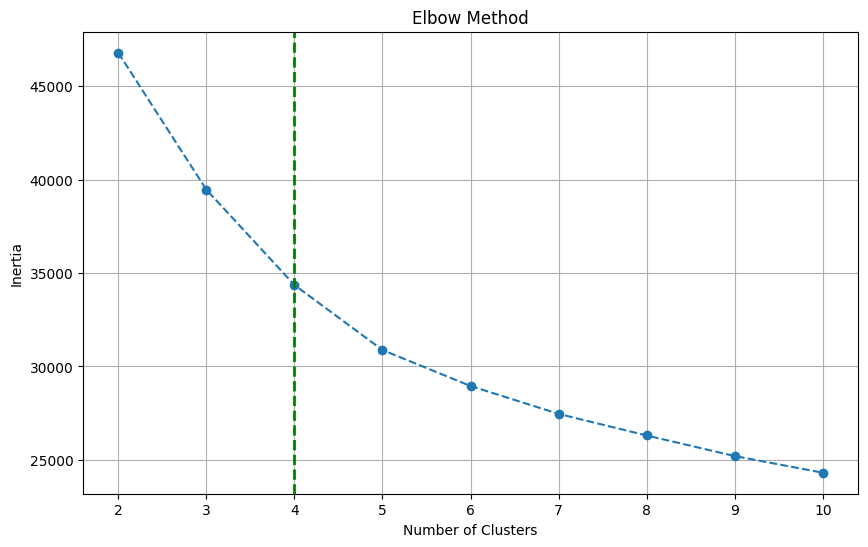

In [30]:
from sklearn.cluster import KMeans

# Define a range of clusters
cluster_range = range(2, 11)

# Compute KMeans for each number of clusters
inertias = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(Altered_Data_Dropped)
    inertias.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.axvline(x=4, color='green', linestyle='--', linewidth=2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

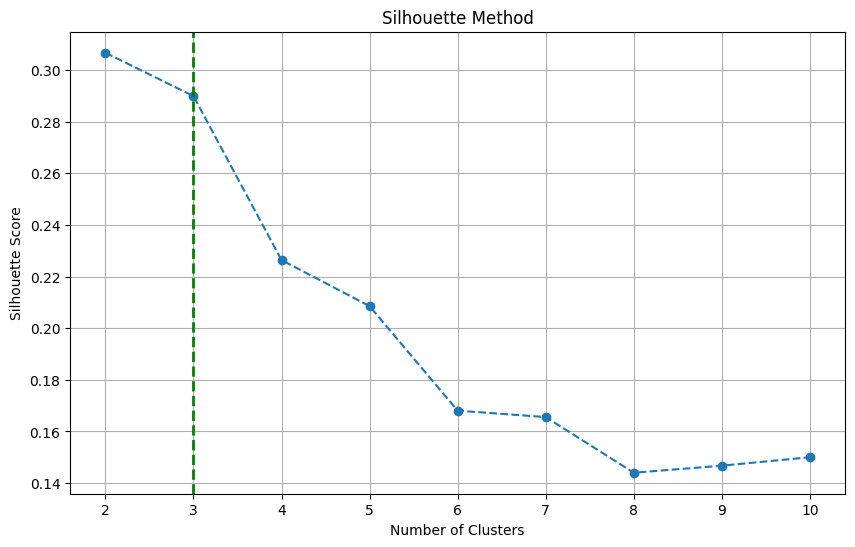

In [31]:
# Create Silhouette scores
silhouette_scores = [silhouette_score(Altered_Data_Dropped, KMeans(n_clusters=k, random_state=42).fit_predict(Altered_Data_Dropped)) for k in cluster_range]

# Plot the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.axvline(x=3, color='green', linestyle='--', linewidth=2)
plt.show()

In [32]:
from sklearn.cluster import KMeans

# Initialize KMeans with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Fit the model to the normalized data
kmeans_4.fit(Altered_Data_Dropped)

# Obtain cluster labels
labels = kmeans_4.labels_
cluster_labels = pd.DataFrame(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# Steps for creating new dataframe with Cluster assignments, positions of players, and all player statistics

# 1) Append clusters to Altered_Data_Dropped
Altered_Data_Dropped['Cluster'] = cluster_labels

# We want to add a position column to the Altered_Data_Dropped dataframe

# 2) Create new dataframe that has Position column
df_including_positions = Without_TOT_D1

# 3) Find indices of NaN values
nan_indices = np.isnan(normalized_data).any(axis=1)

# 4) Remove rows with NaN values
df_including_positions = df_including_positions[~nan_indices]
df_including_positions_Dropped = df_including_positions.reset_index(drop = True)

# 5) Append Cluster column to df_including_positions_Dropped df
df_including_positions_Dropped['Cluster'] = Altered_Data_Dropped['Cluster']

# 6) Create Decade1_Cluster_Data
Decade1_Cluster_Data = df_including_positions_Dropped

# Principal Compononent Scatter Plot


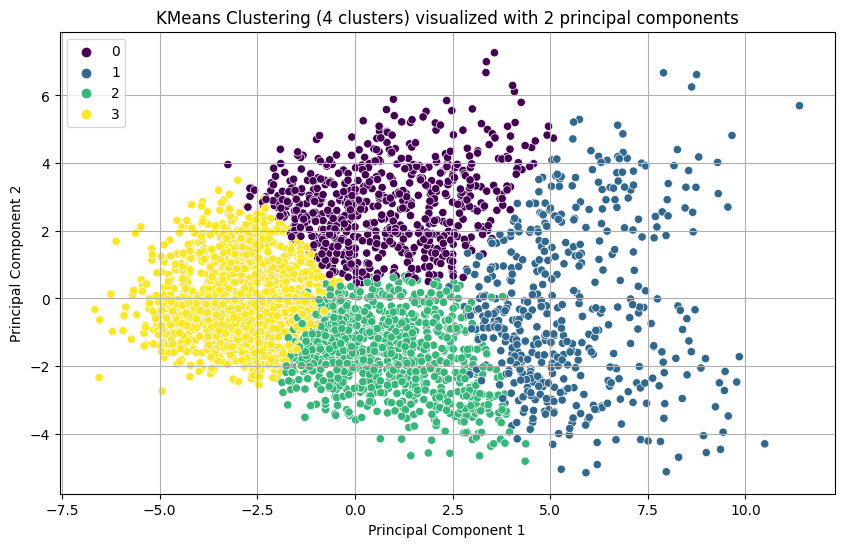

In [34]:
# PC Scatter Plot
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=labels, palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (4 clusters) visualized with 2 principal components')
plt.legend()
plt.grid(True)
plt.show()

# Cluster Averages

In [35]:
Cluster_1 = Decade1_Cluster_Data[Decade1_Cluster_Data['Cluster'] == 0]
Cluster_2 = Decade1_Cluster_Data[Decade1_Cluster_Data['Cluster'] == 1]
Cluster_3 = Decade1_Cluster_Data[Decade1_Cluster_Data['Cluster'] == 2]
Cluster_4 = Decade1_Cluster_Data[Decade1_Cluster_Data['Cluster'] == 3]


cluster_1_stats = Cluster_1.describe()
cluster_2_stats = Cluster_2.describe()
cluster_3_stats = Cluster_3.describe()
cluster_4_stats = Cluster_4.describe()

Decade1_Cluster_Averages = pd.concat([cluster_1_stats.loc[['mean']], cluster_2_stats.loc[['mean']], cluster_3_stats.loc[['mean']], cluster_4_stats.loc[['mean']]])
Decade1_Cluster_Averages['Cluster'] = [0, 1, 2, 3]
Decade1_Cluster_Averages = pd.DataFrame(Decade1_Cluster_Averages)
Decade1_Cluster_Averages = Decade1_Cluster_Averages.drop(columns = 'GP')

In [36]:
# Subsetting Cluster Average Columns
pts_column = Decade1_Cluster_Averages['PTS']
ast_column = Decade1_Cluster_Averages['AST']
trb_column = Decade1_Cluster_Averages['TRB']
blk_column = Decade1_Cluster_Averages['BLK']
stl_column = Decade1_Cluster_Averages['STL']
three_column = Decade1_Cluster_Averages['3PA']
two_column = Decade1_Cluster_Averages['2PA']
fta_column = Decade1_Cluster_Averages['FTA']

# Drop columns from the DataFrame
Decade1_Cluster_Averages = Decade1_Cluster_Averages.drop(columns=['PTS'])
Decade1_Cluster_Averages = Decade1_Cluster_Averages.drop(columns=['AST'])
Decade1_Cluster_Averages = Decade1_Cluster_Averages.drop(columns=['TRB'])
Decade1_Cluster_Averages = Decade1_Cluster_Averages.drop(columns=['BLK'])
Decade1_Cluster_Averages = Decade1_Cluster_Averages.drop(columns=['STL'])
Decade1_Cluster_Averages = Decade1_Cluster_Averages.drop(columns=['3PA'])
Decade1_Cluster_Averages = Decade1_Cluster_Averages.drop(columns=['2PA'])
Decade1_Cluster_Averages = Decade1_Cluster_Averages.drop(columns=['FTA'])

# Insert columns to new position
Decade1_Cluster_Averages.insert(0, 'PTS', pts_column)
Decade1_Cluster_Averages.insert(1, 'AST', ast_column)
Decade1_Cluster_Averages.insert(2, 'TRB', trb_column)
Decade1_Cluster_Averages.insert(3, 'BLK', blk_column)
Decade1_Cluster_Averages.insert(4, 'STL', stl_column)
Decade1_Cluster_Averages.insert(5, '3PA', three_column)
Decade1_Cluster_Averages.insert(6, '2PA', two_column)
Decade1_Cluster_Averages.insert(7, 'FTA', fta_column)

# Set the index as Cluster
Decade1_Cluster_Averages = Decade1_Cluster_Averages.set_index('Cluster')

In [37]:
# Subset to inferential columns
Decade1_Cluster_Averages[['PTS', 'AST', 'TRB', 'BLK', 'STL', '3PA', '3P%', '2PA', '2P%', 'FTA', 'FT%']]

,PTS,AST,TRB,BLK,STL,3PA,3P%,2PA,2P%,FTA,FT%
Cluster,,,,,,,,,,,
0,8.867766,1.229385,5.976162,0.856672,0.685157,0.269865,0.126238,6.928336,0.498247,2.579010,0.692066
1,20.437449,3.911317,6.829835,0.766667,1.238477,2.545267,0.303140,13.599177,0.485430,5.888272,0.782632
2,11.862025,3.358439,3.521835,0.265084,0.988291,3.298523,0.363585,6.685338,0.462772,2.502215,0.798395
3,4.558650,1.278433,2.050970,0.192552,0.473002,1.057719,0.273662,3.166874,0.431275,1.024515,0.730565


In [38]:
# Check for cluster player examples by typing in random player names, for example, Kobe Bryant
Decade1_Cluster_Data[Decade1_Cluster_Data['Player'] == 'Kobe Bryant*']

,Player,Position,Team,GP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,Personal_Fouls,PTS,Season,Cluster
40,Kobe Bryant*,SG,LAL,68,10.3,22.2,0.464,0.9,2.9,0.305,...,1.5,4.3,5.9,5.0,1.7,0.6,3.3,28.5,2000-01,1
377,Kobe Bryant*,SG,LAL,80,9.4,20.0,0.469,0.4,1.7,0.250,...,1.4,4.1,5.5,5.5,1.5,0.4,2.9,25.2,2001-02,1
699,Kobe Bryant*,SG,LAL,82,10.6,23.5,0.451,1.5,4.0,0.383,...,1.3,5.6,6.9,5.9,2.2,0.8,2.7,30.0,2002-03,1
1012,Kobe Bryant*,SG,LAL,65,7.9,18.1,0.438,1.1,3.3,0.327,...,1.6,3.9,5.5,5.1,1.7,0.4,2.7,24.0,2003-04,1
1346,Kobe Bryant*,SG,LAL,66,8.7,20.1,0.433,2.0,5.9,0.339,...,1.4,4.5,5.9,6.0,1.3,0.8,2.6,27.6,2004-05,1
1690,Kobe Bryant*,SG,LAL,80,12.2,27.2,0.450,2.3,6.5,0.347,...,0.9,4.4,5.3,4.5,1.8,0.4,2.9,35.4,2005-06,1
2043,Kobe Bryant*,SG,LAL,77,10.6,22.8,0.463,1.8,5.2,0.344,...,1.0,4.7,5.7,5.4,1.4,0.5,2.7,31.6,2006-07,1
2382,Kobe Bryant*,SG,LAL,82,9.5,20.6,0.459,1.8,5.1,0.361,...,1.1,5.2,6.3,5.4,1.8,0.5,2.8,28.3,2007-08,1
2734,Kobe Bryant*,SG,LAL,82,9.8,20.9,0.467,1.4,4.1,0.351,...,1.1,4.1,5.2,4.9,1.5,0.5,2.3,26.8,2008-09,1
3081,Kobe Bryant*,SG,LAL,73,9.8,21.5,0.456,1.4,4.1,0.329,...,1.1,4.3,5.4,5.0,1.5,0.3,2.6,27.0,2009-10,1
